https://s3.amazonaws.com/amazon-reviews-pds/readme.html

```

DATA COLUMNS:
marketplace       - 2 letter country code of the marketplace where the review was written.
customer_id       - Random identifier that can be used to aggregate reviews written by a single author.
review_id         - The unique ID of the review.
product_id        - The unique Product ID the review pertains to. In the multilingual dataset the reviews
                    for the same product in different countries can be grouped by the same product_id.
product_parent    - Random identifier that can be used to aggregate reviews for the same product.
product_title     - Title of the product.
product_category  - Broad product category that can be used to group reviews 
                    (also used to group the dataset into coherent parts).
star_rating       - The 1-5 star rating of the review.
helpful_votes     - Number of helpful votes.
total_votes       - Number of total votes the review received.
vine              - Review was written as part of the Vine program.
verified_purchase - The review is on a verified purchase.
review_headline   - The title of the review.
review_body       - The review text.
review_date       - The date the review was written.
```

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('amazon_reviews_us_Grocery_v1_00.tsv.gz', 
                 nrows=40000, sep='\t', error_bad_lines=False)

b'Skipping line 1925: expected 15 fields, saw 22\nSkipping line 1977: expected 15 fields, saw 22\nSkipping line 35265: expected 15 fields, saw 22\n'


In [2]:

df.head(5)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5,0,0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31
1,US,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5,0,0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31
2,US,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5,0,0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31
3,US,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5,0,0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31
4,US,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5,0,0,N,Y,Five Stars,good,2015-08-31


In [18]:
import re
bad_words = ['contaminate','disease', 'disgusting',
             'eaten', 'hazardous', 'ill', 'moldy', 'mldew',
             'musty','reeking', 'smelly', 'stale', 'unhealthy']

In [19]:
df_bad = df[df['review_body'].apply(lambda x: bool(re.search('|'.join(bad_words), x.lower())))]

In [25]:
df_bad[df_bad['star_rating'] == 1]['customer_id'].value_counts()

14606512    6
42935991    3
41617771    2
12286869    2
34653588    2
           ..
119471      1
27387231    1
6563507     1
24108725    1
5817935     1
Name: customer_id, Length: 571, dtype: int64

In [26]:
df[df['customer_id'] == 14606512]

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
9409,14606512,R22YYJHWGSPHYS,B0041POVZU,747454326,"Kitchen Basics No Salt Chicken Stock, 32 oz",1,9,11,N,N,Beware: Now Contains MSG!,"Beware: Now Contains MSG!. Well, that didn't t...",2015-08-28
9683,14606512,REI8B6O0R60E4,B0046H718C,411013441,"Kitchen Basics Unsalted Chicken Stock, 32-Ounc...",1,1,1,N,N,Beware: Now Contains MSG!,"Beware: Now Contains MSG!. Well, that didn't t...",2015-08-28
9956,14606512,R9WM0NJV3Y0BK,B00HXSIOSC,412645857,Stock Chckn Gluten Free 64 OZ -Pack Of 8,1,0,0,N,Y,Beware: Now Contains MSG!,"Beware: Now Contains MSG!. Well, that didn't t...",2015-08-28
10066,14606512,R272TGTLFQMQB2,B0078DSZA4,917287535,"KITCHEN BASICS STOCK CHCKN GF, 8.25 OZ",1,1,1,N,N,Beware: Now Contains MSG!,"Beware: Now Contains MSG!. Well, that didn't t...",2015-08-28
10337,14606512,R2CLNGRT2TN0AJ,B009S4PK7C,345526253,"Kitchen Basics Stock, 8.25 Ounce (Pack of 12)",1,51,59,N,N,Beware: Now Contains MSG!,"Beware: Now Contains MSG!. Well, that didn't t...",2015-08-28
10730,14606512,R1RGNDVR88QW4X,B004UB85K2,345526253,"Kitchen Basics Stock, 8.25 Ounce (Pack of 12)",1,8,10,N,N,Beware: Now Contains MSG!,"Beware: Now Contains MSG!. Well, that didn't t...",2015-08-28


# spacy

In [30]:
!python3 -m spacy download en_core_web_sm

2021-04-15 15:26:20.208021: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |█████▋                          | 2.4 MB 38 kB/s eta 0:04:578^C


Aborted!


In [31]:
import en_core_web_sm
nlp = en_core_web_sm.load()

import spacy
nlp = spacy.load("en_core_web_sm")

In [37]:
sentences = [
  'The food we had yesterday was delicious',
  'My time in Italy was very enjoyable',
  'I found the meal to be tasty',
  'The internet was slow.',
  'Our experience was suboptimal'
]

for sentence in sentences:
    doc = nlp(sentence)
    descriptive_term = ''
    for token in doc:
        if token.pos_ == 'ADJ':
            descriptive_term = token
    print(sentence, ':: ', descriptive_term)

The food we had yesterday was delicious ::  delicious
My time in Italy was very enjoyable ::  enjoyable
I found the meal to be tasty ::  tasty
The internet was slow. ::  slow
Our experience was suboptimal ::  suboptimal


In [40]:
%time 
aspects = []
for sentence in sentences:
    doc = nlp(sentence)
    descriptive_term = ''
    target = ''
    for token in doc:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        if token.pos_ == 'ADJ':
            prepend = ''
            for child in token.children:
                if child.pos_ != 'ADV':
                    continue
                prepend += child.text + ' '
            descriptive_term = prepend + token.text
    aspects.append({'aspect': target, 'description': descriptive_term})
    print(sentence)
    print({'aspect': target, 'description': descriptive_term})
    print('')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
The food we had yesterday was delicious
{'aspect': 'food', 'description': 'delicious'}

My time in Italy was very enjoyable
{'aspect': 'time', 'description': 'very enjoyable'}

I found the meal to be tasty
{'aspect': 'meal', 'description': 'tasty'}

The internet was slow.
{'aspect': 'internet', 'description': 'slow'}

Our experience was suboptimal
{'aspect': 'experience', 'description': 'suboptimal'}



In [51]:
%time
for sentence in df[df['star_rating'] <= 3]['review_body'].iloc[:1000]:
    doc = nlp(sentence)
    descriptive_term = ''
    target = ''
    for token in doc:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        if token.pos_ == 'ADJ':
            prepend = ''
            for child in token.children:
                if child.pos_ != 'ADV':
                    continue
                prepend += child.text + ' '
            descriptive_term = prepend + token.text
    aspects.append({'aspect': target, 'description': descriptive_term})
    # print(sentence)
    if 'funky' == descriptive_term.lower():
        print(sentence)
        print({'aspect': target, 'description': descriptive_term})
        print('')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
This is the weirdest "soup" I ever tasted. But .... This is the weirdest &#34;soup&#34; I ever tasted.  But, instead of throwing it out, I added MSG, salt, pepper, powdered onion, spike seasoning, lemon juice, olive oil, celery, corn, Sriracha, and I can't remember what else to make it edible.  Still was leaving a funky taste in my mouth.
{'aspect': '', 'description': 'funky'}



In [3]:
df = df.drop(['marketplace', 'product_category'], axis=1)

df = df[~df['review_body'].isnull()]

df['review_body'] = df['review_headline'] + '. ' + df['review_body']

In [4]:

df = df[df['review_body'].apply(len) > 40]

In [5]:
customer_count = df.groupby(['customer_id', 'review_date'])['product_id'].count().reset_index()
customer_count.columns = ['customer_id', 'review_date', 'review_count']

customer_count = customer_count[customer_count['review_count'] > 5]
customer_count.sort_values(by='review_count')


,customer_id,review_date,review_count
0,10805,2015-08-19,6
9985,20613913,2015-08-25,6
10787,22476158,2015-08-21,6
11026,22943881,2015-08-22,6
11169,23220887,2015-08-22,6
...,...,...,...
16492,36290808,2015-08-31,15
16911,37293783,2015-08-19,17
1093,1535682,2015-08-28,17
10027,20674418,2015-08-29,18


In [6]:
df[df['customer_id'] == 1535682]

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
8505,1535682,R259ZCCPVMAO4Z,B0082B7P16,533825475,"Hollywood Safflower Oil, 32 Ounce Bottle",5,0,0,N,Y,Five Stars,"Five Stars. Good product, nice oil<br />Good p...",2015-08-28
8552,1535682,R1U0ADA596INCW,B00KZNGP4W,910616800,Campbell's Pork & Beans,5,0,1,N,Y,Five Stars,Five Stars. Good as always as a side dish deli...,2015-08-28
8592,1535682,R29862ZMJ5E277,B000YPQC08,706238482,"Rice-A-Roni Herb & Butter, 7.2-Ounce Boxes (Pa...",5,0,0,N,Y,Five Stars,Five Stars. Very good product....<br />Easy to...,2015-08-28
8604,1535682,R3AIOO6EDMJ2JC,B001IZ8AAI,785993145,"Freedent Gum, 15-Stick Plen-T-Paks (Pack of 24)",5,0,0,N,Y,Five Stars,Five Stars. Great price<br />Good product,2015-08-28
8962,1535682,R146UDOTGKUHCF,B001SAZJ6G,551061531,Krusteaz Fat Free Honey Cornbread Mix,4,0,0,N,Y,Very moist Great product Easy to make,Very moist Great product Easy to make. Very mo...,2015-08-28
9404,1535682,R3ECPWWZ4QOKTB,B005K4Q1YA,795563511,"Grove Square Cappuccino, Single Serve Cup for ...",5,0,0,N,Y,I enjoyed these Flavor was good,I enjoyed these Flavor was good. I enjoyed the...,2015-08-28
9412,1535682,R3JUBQBB08SFIT,B00E9NZC66,389243328,"Campbell's Chunky Soup, Variety Pack, 18.6 Oun...",5,0,1,N,Y,Five Stars,Five Stars. I would order these again<br />Del...,2015-08-28
9513,1535682,RUQZR7KY5TQJD,B00FMBL5G0,452891721,Gevalia Cafe Style Beverages,5,0,0,N,Y,Excellent I'm going to order each month I enjo...,Excellent I'm going to order each month I enjo...,2015-08-28
9729,1535682,R1IC88YG7VGYJI,B001FA1EVS,800370059,Hershey's Special Dark Chocolate Bar,5,0,0,N,Y,Five Stars,Five Stars. Excellent snack<br />Dark chocolat...,2015-08-28
9830,1535682,R2BG6L1ZHRV961,B00OGLTBXG,803158222,"BIALY, BY THE DOZEN [ TWO 6 PACKS ]",5,0,0,N,Y,Excellent Would buy them again Delicious,Excellent Would buy them again Delicious. Exce...,2015-08-28


In [180]:
df['review_body'].value_counts()

Best brand spice blends out there!!. Teeny Tiny Spice Co. RULES!!!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [183]:
df[df['review_body'] == 'Best brand spice blends out there!!. Teeny Tiny Spice Co. RULES!!!']

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
5722,20674418,R2B0RX6RUFGRCT,B007NZTMSQ,663121827,Teeny Tiny Spice Co of Vermont Kosher Himalaya...,5,1,1,N,Y,Best brand spice blends out there!!,Best brand spice blends out there!!. Teeny Tin...,2015-08-29
6080,20674418,R23PPHOR6LS9CF,B0063J1PLU,802153228,Teeny Tiny Spice Co of Vermont Organic Persian...,5,1,1,N,Y,Best brand spice blends out there!!,Best brand spice blends out there!!. Teeny Tin...,2015-08-29
6110,20674418,R26AW9IZTR2HJJ,B0063J1QFK,227819371,Teeny Tiny Spice Co. of Vermont Organic Tandoo...,5,1,1,N,Y,Best brand spice blends out there!!,Best brand spice blends out there!!. Teeny Tin...,2015-08-29
6298,20674418,RUC1TPP14YR6P,B0063J1KLK,945713958,Teeny Tiny Spice Co. of Vermont Organic Britis...,5,1,1,N,Y,Best brand spice blends out there!!,Best brand spice blends out there!!. Teeny Tin...,2015-08-29
6329,20674418,R1897JIK6NN4G6,B00CC397L6,740716851,Teeny Tiny Spice Co. of Vermont Organic WhoopA...,5,1,1,N,Y,Best brand spice blends out there!!,Best brand spice blends out there!!. Teeny Tin...,2015-08-29
6342,20674418,R28D3ENJ06TYTQ,B007NZUK6O,81301745,Teeny Tiny Spice Co of Vermont Organic Harissa...,5,1,1,N,Y,Best brand spice blends out there!!,Best brand spice blends out there!!. Teeny Tin...,2015-08-29
6380,20674418,R2XWQKNCNUZZYR,B0063J1QAA,377745278,Teeny Tiny Spice Co. of Vermont Organic Shephe...,5,0,0,N,Y,Best brand spice blends out there!!,Best brand spice blends out there!!. Teeny Tin...,2015-08-29
6385,20674418,R197MAUPKSABDW,B0063J1P9W,654564533,Teeny Tiny Spice Co. of Vermont Organic Perfec...,5,1,2,N,Y,Best brand spice blends out there!!,Best brand spice blends out there!!. Teeny Tin...,2015-08-29
6395,20674418,R74UT22PYF3N4,B00LG03GYA,461204413,Teeny Tiny Spice Company Organic Hot Italian S...,5,2,2,N,Y,Best brand spice blends out there!!,Best brand spice blends out there!!. Teeny Tin...,2015-08-29
6691,20674418,R2JRXLS0WY6DA1,B0063J1QTG,99517704,Teeny Tiny Spice Co. of Vermont Organic Vadava...,5,1,2,N,Y,Best brand spice blends out there!!,Best brand spice blends out there!!. Teeny Tin...,2015-08-29


# TFIDF

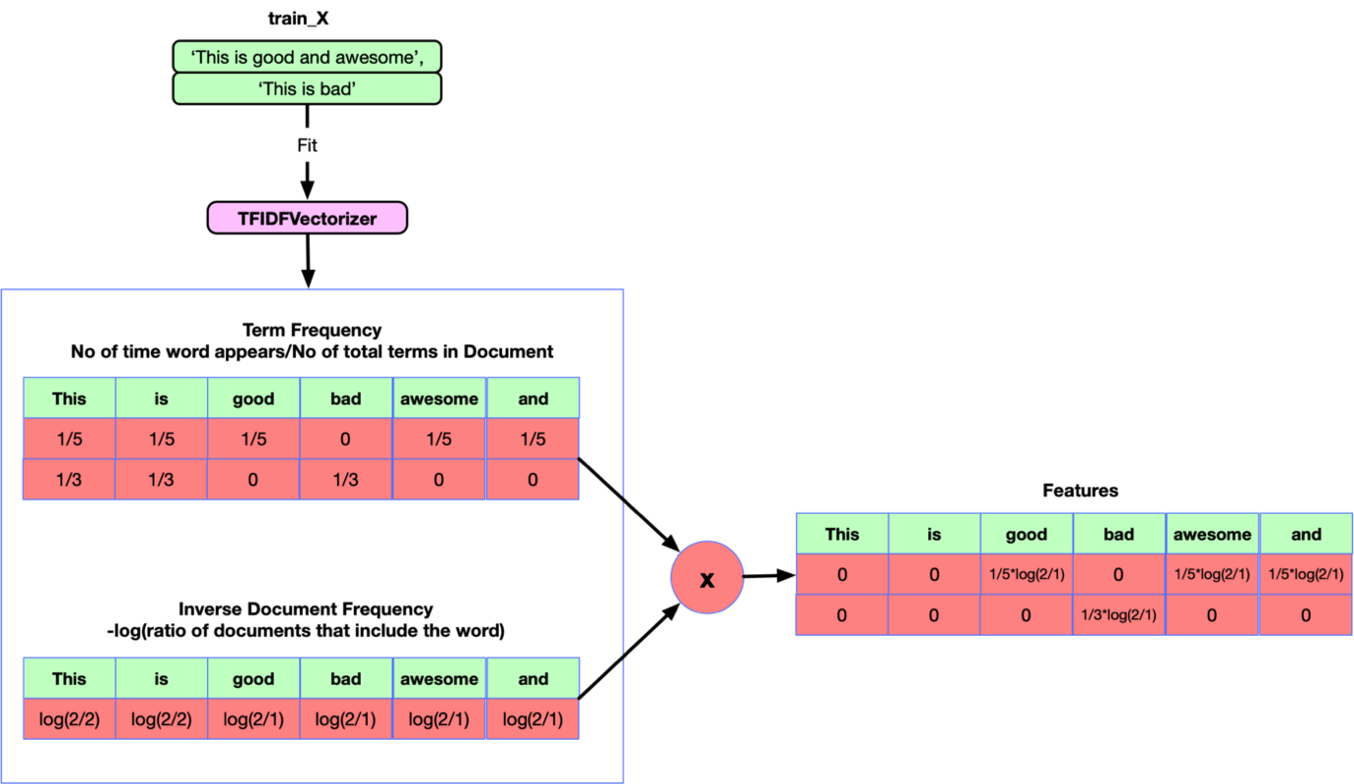

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
review_tfidf = tfidf.fit_transform(df['review_body'])

In [7]:
review_tfidf.shape

# 1*5000  30975*5000

(30975, 5000)

In [16]:
IDX = 0

bad_list = []

for IDX_start in range(int(review_tfidf.shape[0]/1000) +1):
    idss = np.dot(
        review_tfidf[
            IDX_start*1000:
            (IDX_start+1)*1000
        ], 
        review_tfidf.T
    ).toarray()


    for ids in idss:
        IDX += 1
        # 
        if len(np.where(ids >= 0.99)[0])==1:
            continue
        
        print(np.where(ids >= 0.99)[0])
        
        df.iloc[np.where(ids >= 0.99)[0]][['customer_id', 'review_id', 'star_rating', 'review_body']].sort_values(by='star_rating').to_csv('t.csv', index=None, header=None, mode='a')
        
        bad_list.extend(list(np.where(ids >= 0.99)[0]))
        # A -> B
        # B -> A

[   57   226   813   925  1180  1198  1877  2334 24579]
[  74  208  251  655 1328 1381 1636 1846 1856 1976 1980]
[  139 10017 12308 12408 12457 12893]
[ 188  515 1089 1292 2179]
[  74  208  251  655 1328 1381 1636 1846 1856 1976 1980]
[   57   226   813   925  1180  1198  1877  2334 24579]
[  74  208  251  655 1328 1381 1636 1846 1856 1976 1980]
[ 260  405  872 1889 2058]
[288 649 926]
[ 260  405  872 1889 2058]
[ 188  515 1089 1292 2179]
[ 533 1793]
[288 649 926]
[  74  208  251  655 1328 1381 1636 1846 1856 1976 1980]
[ 668 1475]
[760 861]
[ 812 1705]
[   57   226   813   925  1180  1198  1877  2334 24579]
[  857 24615]
[760 861]
[ 260  405  872 1889 2058]
[   57   226   813   925  1180  1198  1877  2334 24579]
[288 649 926]
[ 958 1558]
[ 188  515 1089 1292 2179]
[   57   226   813   925  1180  1198  1877  2334 24579]
[   57   226   813   925  1180  1198  1877  2334 24579]
[1239 1887]
[1260 2125]
[ 188  515 1089 1292 2179]
[  74  208  251  655 1328 1381 1636 1846 1856 1976 1980]
[  7

KeyboardInterrupt: 

In [15]:
 df.iloc[np.where(ids >= 0.99)[0]][
     ['customer_id', 'review_id', 'review_body']].to_csv('t.csv', index=None, header=None, mode='a')

In [209]:
df.iloc[list(set(bad_list))]

np.where(np.array([1, 0.8, 0.7]) > 0.7)

In [198]:
df.iloc[[ 3510, 11438]]

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
4595,44382309,R1RZFQQBXGIDXE,B00LM8XFY2,916767478,"Sunny Day Organics Raw Vanilla Bean Powder, 4....",5,0,0,N,Y,Five Stars,Five Stars. Great product. Arrived quickly!,2015-08-30
14738,23282816,R3VRQ0OYVBFWFZ,B00CRJKA6G,30186250,"CK Products Isomalt Crystals Bulk, 5 Pound",5,0,0,N,Y,Five Stars,Five Stars. Great product! Arrived quickly.,2015-08-26


In [46]:
df['customer_product'] = df['customer_id'].astype(str) + '_' + df['product_id'].astype(str)

In [47]:
df['customer_product'].value_counts()

13879735_B003WO0I6C    2
43106369_B00FRTXDDA    1
15331531_B008BAKDKS    1
14460749_B00WZNUZNW    1
35629847_B00HVJI7KI    1
                      ..
35982233_B00UAL6D6Y    1
52196386_B007C7JFGE    1
13724629_B00DLKFUOW    1
52263513_B00CQ87KXY    1
52263513_B00F9XUD46    1
Name: customer_product, Length: 39994, dtype: int64

In [48]:
df[df['customer_product'] == '13879735_B003WO0I6C']

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,customer_product
26497,13879735,R37A5SE85MPPDQ,B003WO0I6C,74657246,"SweetLeaf Sweetener (70-Count Packets), 2.5-Ou...",5,3,3,N,N,"Great pack of three, all natural stevia product","Great pack of three, all natural stevia produc...",2015-08-22,13879735_B003WO0I6C
27990,13879735,R1LUOS1KTVQ7P8,B003WO0I6C,74657246,"SweetLeaf Sweetener (70-Count Packets), 2.5-Ou...",5,0,0,N,N,Good value for three pack,Good value for three pack. I bought this becau...,2015-08-22,13879735_B003WO0I6C


In [49]:
customer_rate_mean = df.groupby(['customer_id'])['star_rating'].mean()
customer_rate_count = df['customer_id'].value_counts()

In [50]:
customer_rate_mean = customer_rate_mean.reset_index()
customer_rate_mean.columns = ['customer_id', 'rating']

customer_rate_count = customer_rate_count.reset_index()
customer_rate_count.columns = ['customer_id', 'count']

In [51]:
customer_rate_mean.columns, customer_rate_count.columns

(Index(['customer_id', 'rating'], dtype='object'),
 Index(['customer_id', 'count'], dtype='object'))

In [52]:
customer_df = pd.merge(customer_rate_mean, customer_rate_count, on='customer_id')

In [53]:
customer_df.sort_values(by='count', ascending=False)

,customer_id,rating,count
10576,17162238,4.632653,49
19263,34247947,4.906250,32
4890,10795448,5.000000,24
19751,35178127,4.454545,22
19456,34638680,5.000000,22
...,...,...,...
11602,19080691,1.000000,1
11601,19079785,5.000000,1
11600,19078903,1.000000,1
11599,19078115,5.000000,1


In [59]:
customer_df[(customer_df['count'] >= 5) & (customer_df['rating'] <=1)]

,customer_id,rating,count
2908,4881029,1.0,5
8403,14606512,1.0,6
27069,48236895,1.0,8


In [56]:
select_customer = customer_df[(customer_df['count'] >= 2) & (customer_df['rating'] <=1)]['customer_id']

df[df['customer_id'].isin(select_customer)][['customer_id','review_headline', 'review_body']].sort_values(by='customer_id')

,customer_id,review_headline,review_body
28999,145437,I happen to like the half-and-half mixture,I happen to like the half-and-half mixture. I ...
28936,145437,I happen to like the half-and-half mixture,I happen to like the half-and-half mixture. I ...
5598,661293,Didn't give desired nutritional effects.,Didn't give desired nutritional effects.. Not ...
3504,661293,Not reliable.,Not reliable.. Did not have the desired effect...
34354,1211659,I am French and this sauce is an absolute insu...,I am French and this sauce is an absolute insu...
...,...,...,...
4347,52589382,I really hate being duped. What a waste of mo...,I really hate being duped. What a waste of mo...
9737,52672134,Misleading. if not outright fraud,Misleading. if not outright fraud. These are n...
10000,52672134,Garbage,Garbage. Don't be fooled. This product is not...
18486,52789885,Not very tasty.,Not very tasty.. Frosting was melted - not ver...


In [57]:
select_customer

322        145437
882        661293
1269      1211659
1924      2185386
2453      3263580
           ...   
29582    51741237
29662    51826894
30367    52589382
30441    52672134
30555    52789885
Name: customer_id, Length: 75, dtype: int64

In [40]:
df[df['star_rating'] == 1]['review_body']

9       Used to be a decent product.  Disgusting now a...
17      I bought this from a local super market on a w...
23      not craze about these. nothing really wrong wi...
40      This product is beautifully labelled. That's a...
99          Not what I expected.  Did not like it at all.
                              ...                        
9952                                 Mushrooms are moldy!
9956    Well, that didn't take long.  New Corporate Ow...
9984    The banana is very thin and watery and has an ...
9993    While this mix makes great waffles, you used t...
9994    This states it's &#34;Latin flavor&#34;. Wish ...
Name: review_body, Length: 729, dtype: object

In [41]:
import nltk

```
CC coordinating conjunction
CD cardinal digit
DT determiner
EX existential there (like: “there is” … think of it like “there exists”)
FW foreign word
IN preposition/subordinating conjunction
JJ adjective ‘big’
JJR adjective, comparative ‘bigger’
JJS adjective, superlative ‘biggest’
LS list marker 1)
MD modal could, will
NN noun, singular ‘desk’
NNS noun plural ‘desks’
NNP proper noun, singular ‘Harrison’
NNPS proper noun, plural ‘Americans’
PDT predeterminer ‘all the kids’
POS possessive ending parent’s
PRP personal pronoun I, he, she
PRP$ possessive pronoun my, his, hers
RB adverb very, silently,
RBR adverb, comparative better
RBS adverb, superlative best
RP particle give up
TO, to go ‘to’ the store.
UH interjection, errrrrrrrm
VB verb, base form take
VBD verb, past tense, took
VBG verb, gerund/present participle taking
VBN verb, past participle is taken
VBP verb, sing. present, known-3d take
VBZ verb, 3rd person sing. present takes
WDT wh-determiner which
WP wh-pronoun who, what
WP$ possessive wh-pronoun whose
WRB wh-adverb where, when

```

In [157]:
# https://www.nltk.org/book/ch05.html
tokens = nltk.word_tokenize('Mushrooms are moldy!')
nltk.pos_tag(tokens)

[('Mushrooms', 'NNS'), ('are', 'VBP'), ('moldy', 'JJ'), ('!', '.')]

In [158]:
tokens

['Mushrooms', 'are', 'moldy', '!']

In [85]:
for line in df[df['star_rating'] == 1]['review_body']:
    line = line.replace('<br />', '')
    
    tokens = nltk.word_tokenize(line)
    tags = nltk.pos_tag(tokens)
    rags_select = []
    for tag in tags:
        if tag[1] in ['JJ', 'JJR', 'JJS', 'VBG']:
            rags_select.append(tag[0])
    
    print(line)
    print(rags_select)
    
    print('')

Used to be a decent product.  Disgusting now and difficult on digestion.  All 3 purchased from Costco over past couple months end in same result -- open the container and it smells like rancid oil.  Something not right about how they are making/processing this powder now.  Will not buy again.
['decent', 'Disgusting', 'difficult', 'past', 'couple', 'same', 'Something', 'making/processing']

I bought this from a local super market on a whim and decided to let people know how it tastes. I'm a huge fan of peanut butter and salted caramel.For instance, I had a Salted Caramel and Almond Kind Bar today and it was amazing. It tasted like you would expect it to taste.However, this particular product tastes like a chemical spill. It starts off with a peanut butter taste, but then the (caramel I'm guessing) tastes kind of burnt and chemical-like, and then it finishes with a very salty burnt taste.I had some on a spoon and disliked it, then I put some on pretzel bread and it was slightly palatable

In [22]:
from textblob import TextBlob

# https://textblob.readthedocs.io/en/dev/
text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

blob = TextBlob(text)

for sentence in blob.sentences:

    print(sentence, sentence.sentiment.polarity, sentence.sentiment.subjectivity)
    print('')


The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact. 0.06000000000000001 0.605

Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant. -0.34166666666666673 0.7666666666666666



In [23]:
for line in df[df['star_rating'] == 1]['review_body']:
    line = line.replace('<br />', '')
    
    blob = TextBlob(line)
    for sentence in blob.sentences:
        print(sentence, sentence.sentiment.polarity, sentence.sentiment.subjectivity)
        print('')
    
    print('')

Disgusting now and difficult on digestion. -0.75 1.0

Used to be a decent product. 0.16666666666666666 0.6666666666666666

Disgusting now and difficult on digestion. -0.75 1.0

All 3 purchased from Costco over past couple months end in same result -- open the container and it smells like rancid oil. -0.08333333333333333 0.2916666666666667

Something not right about how they are making/processing this powder now. -0.14285714285714285 0.5357142857142857

Will not buy again. 0.0 0.0


1 Out Of 5 Of My Co-Workers Thought It Was "Okay". 0.5 0.5

I bought this from a local super market on a whim and decided to let people know how it tastes. 0.16666666666666666 0.3333333333333333

I'm a huge fan of peanut butter and salted caramel.For instance, I had a Salted Caramel and Almond Kind Bar today and it was amazing. 0.5333333333333333 0.9

It tasted like you would expect it to taste.However, this particular product tastes like a chemical spill. 0.16666666666666666 0.3333333333333333

It starts of

In [109]:
for line in df[df['star_rating'] == 1]['review_body']:
    line = line.replace('<br />', '')
    
    blob = TextBlob(line)
    for sentence in blob.sentences:
        if sentence.sentiment.polarity >= 0:
            continue
            
        print(sentence, sentence.sentiment.polarity, sentence.sentiment.subjectivity)
        print('')
    
    print('')

Disgusting now and difficult on digestion. -0.75 1.0

All 3 purchased from Costco over past couple months end in same result -- open the container and it smells like rancid oil. -0.08333333333333333 0.2916666666666667

Something not right about how they are making/processing this powder now. -0.14285714285714285 0.5357142857142857



nothing really wrong with them just no into them. -0.5 0.9

These crackers are small so not much room for cheese. -0.175 0.30000000000000004


The actual taste is not consistent with the flavor the label claims to represent. -0.0625 0.175


Not what I expected. -0.1 0.4


But Powerbar changed the formula or something and now they are just awful. -1.0 1.0


These dates were very old upon arrival, and for the most part dry and tasteless. -0.009166666666666656 0.565


I noticed the words 1g Sugar and bought this on the spot at a health food store, believing it was just low sugar but after reading the ingredients at home, I had to drive a long way to return it